# Variational Quantum Eigensolver 

The variational quantum eigensolver (VQE) is a quantum/classical method used to find the approximate ground state energies of Hamiltonians <a name="ref-1"/>[(Peruzzo et al., 2014)](#cite-Peruzzo_2014).

In the example below, VQE is used to find the lowest eigenvalue of the Hadamard gate <a name="ref-2"/>[(Nielsen and Chuang, 2010)](#cite-MikeIke)
\begin{equation}
H = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1\\
1 & -1
\end{bmatrix}.
\end{equation}

The anstas states $\left| \Psi(\theta) \right\rangle$ are prepared using the $R_x(\theta)$ gate. Note that the exact value of minimum eigenvalue is $-\frac{1}{\sqrt{2}}$. Implementation using __[Qiskit](https://qiskit.org/)__.

In [63]:
#VQE example

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fmin_cobyla
from scipy.optimize import minimize

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit
from qiskit.opflow import H, StateFn

In [97]:
n = 1 #Number of qubits
OP = H #Hamiltonian

#Objective function
def Exp(theta):
    
    #Quantum circuit
    QC = QuantumCircuit(n)
    
    #Ansats prepared using Rx gate
    #Apply Rx(theta) gate
    QC.rx(theta[0],0)
    
    #Final state
    Phy = StateFn(QC)
    
    #Expected value
    eh = (~Phy @ H @ Phy).eval()
    
    return eh.real
    
#Test 
theta = np.array([np.pi/2])
print(Exp(theta))

0.0


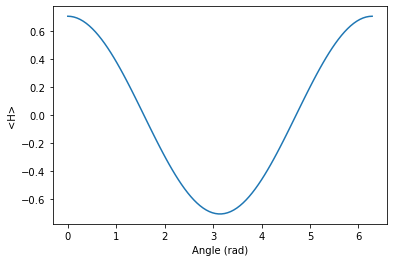

In [98]:
#Plot of <H> vs theta
na = 100 #Number of angles
Angl = np.linspace(0.0,2.0*np.pi,na)
Exps = np.zeros(na)

for i in range(na):
    Exps[i] = Exp(np.array([Angl[i]]))
    
plt.plot(Angl,Exps)
plt.xlabel('Angle (rad)')
plt.ylabel('<H>')
plt.show()

In [100]:
#Optimization

def con1(x):
    return x
def con2(x):
    return 2*np.pi-x

Theta0 = np.array([0.12])
min_angle = fmin_cobyla(Exp, Theta0, [con1, con2], rhoend=1e-9)
print('Minimum angle = %0.8f'%(min_angle[0]))
print('Minimum eigenvalue = %0.8f'%(Exp(min_angle)))

Minimum angle = 3.14159262
Minimum eigenvalue = -0.70710678


<!--bibtex

@book{MikeIke,
    title = {Quantum Computation and Quantum Information},
    author = {Nielsen, Michael A. and Chuang, Issac L},
    year = {2010},
    publisher = {Cambridge University Press}
}

@article{Peruzzo_2014,
   title={A variational eigenvalue solver on a photonic quantum processor},
   volume={5},
   ISSN={2041-1723},
   url={http://dx.doi.org/10.1038/ncomms5213},
   DOI={10.1038/ncomms5213},
   number={1},
   journal={Nature Communications},
   publisher={Springer Science and Business Media LLC},
   author={Peruzzo, Alberto and McClean, Jarrod and Shadbolt, Peter and Yung, Man-Hong and Zhou, Xiao-Qi and Love, Peter J. and Aspuru-Guzik, Alán and O’Brien, Jeremy L.},
   year={2014},
   month={Jul}
}

-->

# References

<a name="cite-Peruzzo_2014"/><sup>[^](#ref-1) </sup>Peruzzo, Alberto and McClean, Jarrod and Shadbolt, Peter and Yung, Man-Hong and Zhou, Xiao-Qi and Love, Peter J. and Aspuru-Guzik, Alán and O’Brien, Jeremy L.. 2014. _A variational eigenvalue solver on a photonic quantum processor_. [URL](http://dx.doi.org/10.1038/ncomms5213)

<a name="cite-MikeIke"/><sup>[^](#ref-2) </sup>Nielsen, Michael A. and Chuang, Issac L. 2010. _Quantum Computation and Quantum Information_.

